In [1]:
import json
import os
import random

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from src.algorithm import *
from src.benchmark import *
from src.temperature import *

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

In [3]:
def run_demo(test_func, test_clip, test_radius, test_target, test_dim, tabu_len, sched_name, sched_params, max_iterations, seed):
    seed_everything(seed)

    log = []
    best_point = np.full(test_dim, test_clip)

    tsa = TabuSimulatedAnnealing(radius=test_radius, clip=test_clip)
    tsa.set_minimize()
    tsa.set_start(point=np.full(test_dim, test_clip), score_function=test_func, tabu_length=tabu_len)

    t = 0
    n_better = 0
    n_worse = 0

    if sched_name == "adaptive":
        temperature = sched_params[0]

    while t < max_iterations:
        if sched_name == "constant":
            temperature = constant(sched_params)
        elif sched_name == "logarithmic":
            temperature = logarithmic(t, sched_params)
        elif sched_name == "geometric":
            temperature = geometric(t, sched_params[0], sched_params[1])
        elif sched_name == "adaptive":
            temperature = adaptive(temperature, sched_params[1], sched_params[2], n_better, n_worse)

        point, score, diff = tsa.next(temperature)
        log.append(point)

        if np.linalg.norm(point - test_target) <= test_radius:
            return log, point

        if diff == "better":
            n_better += 1
            best_point = point
        elif diff == "worse":
            n_worse += 1

        t += 1

    return log, best_point

In [4]:
def draw(test_func, test_clip, test_radius, test_target, test_dim, tabu_len, sched_name, sched_params, max_iterations, seed):
    log, best_point = run_demo(test_func, test_clip, test_radius, test_target, test_dim, tabu_len, sched_name, sched_params, max_iterations, seed)

    #plt.figure(figsize=(4, 4))
    plt.xlim(-test_clip * 1.01, test_clip * 1.01)
    plt.ylim(-test_clip * 1.01, test_clip * 1.01)
    for h in tqdm(log):
        plt.plot(h[0], h[1], color="black", marker="o", markersize=3)
    plt.plot(test_target, test_target, color="red", marker="o", markersize=10)
    plt.plot(best_point[0], best_point[1], color="blue", marker="o", markersize=10)
    plt.title("{} {}".format(sched_name, sched_params))
    #plt.title("{}: {}, tabu: {}, schedule: {}, params: {}, seed: {}".format(test_func.__name__, test_dim, tabu_len, sched_name, sched_params, seed))
    #plt.savefig("{}-{}-{}-{}.png".format(test_func.__name__, test_dim, sched_name, seed), bbox_inches="tight", pad_inches=0.1)
    #plt.show()

In [5]:
"""
SEED = 4
TEST_FUNC = rastrigin
CLIP = 5.12
R = 0.1

plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=10, sched_name="constant", sched_params=10, max_iterations=1e5, seed=SEED)
plt.subplot(1, 4, 2), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=5, sched_name="logarithmic", sched_params=100, max_iterations=1e5, seed=SEED)
plt.subplot(1, 4, 3), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=5, sched_name="geometric", sched_params=(1000, 0.99), max_iterations=1e5, seed=SEED)
plt.subplot(1, 4, 4), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=5, sched_name="adaptive", sched_params=(100, 0.5, 0.05), max_iterations=1e5, seed=SEED)

plt.savefig("{}-2-{}.png".format(TEST_FUNC.__name__, SEED), bbox_inches="tight", pad_inches=0.1)
print("saved")
#plt.show()
"""

'\nSEED = 4\nTEST_FUNC = rastrigin\nCLIP = 5.12\nR = 0.1\n\nplt.figure(figsize=(20, 4))\n\nplt.subplot(1, 4, 1), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=10, sched_name="constant", sched_params=10, max_iterations=1e5, seed=SEED)\nplt.subplot(1, 4, 2), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=5, sched_name="logarithmic", sched_params=100, max_iterations=1e5, seed=SEED)\nplt.subplot(1, 4, 3), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=5, sched_name="geometric", sched_params=(1000, 0.99), max_iterations=1e5, seed=SEED)\nplt.subplot(1, 4, 4), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=5, sched_name="adaptive", sched_params=(100, 0.5, 0.05), max_iterations=1e5, seed=SEED)\n\nplt.savefig("{}-2-{}.png".format(TEST_FUNC.__name__, SEED), bbox_inches="tight", pad_inches=0.1)\nprint("save


saved



saved



saved



saved


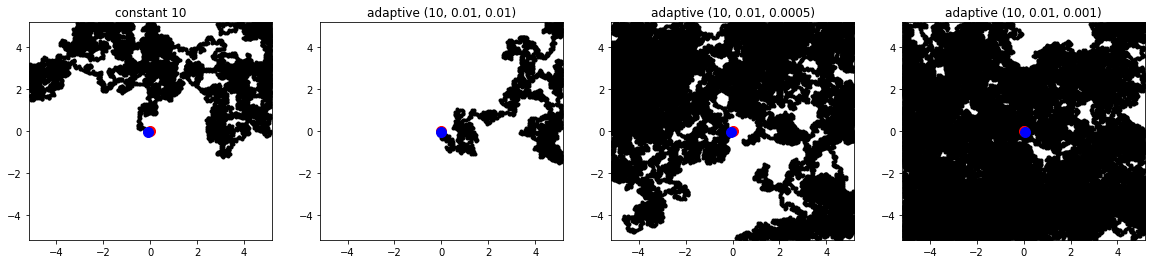

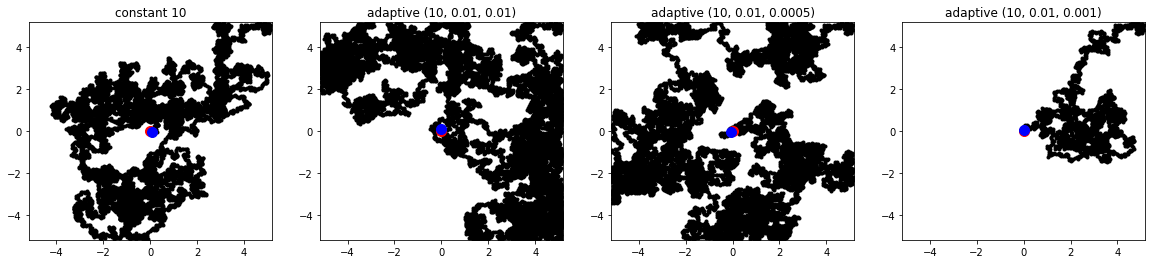

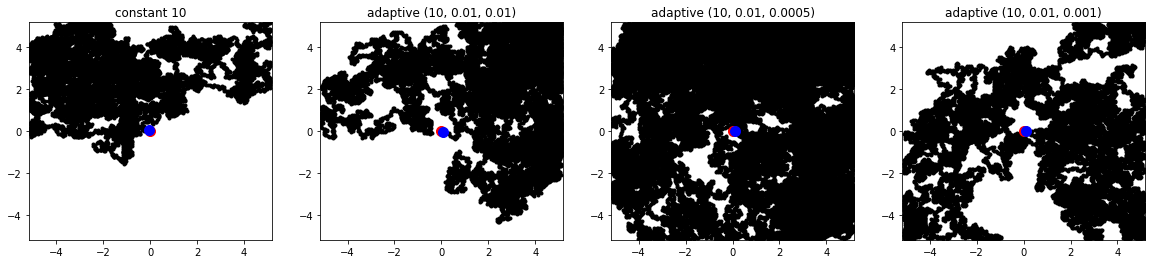

In [ ]:
for SEED in [1, 2, 3, 4]:
    TEST_FUNC = rastrigin
    CLIP = 5.12
    R = 0.1

    plt.figure(figsize=(20, 4))

    plt.subplot(1, 4, 1), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=20, sched_name="constant", sched_params=10, max_iterations=1e5, seed=SEED)
    plt.subplot(1, 4, 2), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=20, sched_name="adaptive", sched_params=(10, 0.01, 0.01), max_iterations=1e5, seed=SEED)
    plt.subplot(1, 4, 3), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=20, sched_name="adaptive", sched_params=(10, 0.01, 0.0005), max_iterations=1e5, seed=SEED)
    plt.subplot(1, 4, 4), draw(test_func=TEST_FUNC, test_clip=CLIP, test_radius=R, test_target=0.0, test_dim=2, tabu_len=20, sched_name="adaptive", sched_params=(10, 0.01, 0.001), max_iterations=1e5, seed=SEED)

    plt.savefig("{}-2-{}_adaptive_0.01.png".format(TEST_FUNC.__name__, SEED), bbox_inches="tight", pad_inches=0.1)
    print("saved")
    #plt.show()